In [3]:
import numpy as np 
import pandas as pd 


In [4]:
df=pd.read_csv("customer_shopping_data.csv")

In [5]:
missing_values = df.isnull().sum()

In [6]:
print(missing_values)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [7]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [9]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

In [10]:
# Step 3: Calculate the total sales for each transaction
df['total_sales'] = df['quantity'] * df['price']

In [11]:
# Step 4: Extract additional features such as day of the week, month, quarter, and year
df['day_of_week'] = df['invoice_date'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['invoice_date'].dt.month  # 1=January, 12=December
df['quarter'] = df['invoice_date'].dt.quarter  # 1=Q1, 4=Q4
df['year'] = df['invoice_date'].dt.year  # Year as an integer

In [12]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,day_of_week,month,quarter,year
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,4,8,3,2022
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,6,12,4,2021
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,1,11,4,2021
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,6,5,2,2021
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,6,10,4,2021


In [13]:
df.dtypes

invoice_no                object
customer_id               object
gender                    object
age                        int64
category                  object
quantity                   int64
price                    float64
payment_method            object
invoice_date      datetime64[ns]
shopping_mall             object
total_sales              float64
day_of_week                int32
month                      int32
quarter                    int32
year                       int32
dtype: object

In [14]:
# Step 5: Check for inconsistent entries (optional)
# For example, check for negative quantities or prices
inconsistent_entries = df[(df['quantity'] < 0) | (df['price'] < 0)]
inconsistent_entries

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales,day_of_week,month,quarter,year


In [15]:
# Optional: Remove or handle inconsistent entries
df = df[(df['quantity'] >= 0) & (df['price'] >= 0)]

In [16]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Step 1: Handling Duplicate Entries
# Check for duplicates
duplicates = df.duplicated()

In [19]:
# Step 2: Encoding Categorical Variables
# Label encode the categorical features like 'gender', 'category', 'payment_method'
label_encoder = LabelEncoder()

df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['category_encoded'] = label_encoder.fit_transform(df['category'])
df['payment_method_encoded'] = label_encoder.fit_transform(df['payment_method'])

In [21]:
df[['gender', 'gender_encoded', 'category', 'category_encoded', 'payment_method', 'payment_method_encoded']].head()


,gender,gender_encoded,category,category_encoded,payment_method,payment_method_encoded
0,Female,0,Clothing,1,Credit Card,1
1,Male,1,Shoes,4,Debit Card,2
2,Male,1,Clothing,1,Cash,0
3,Female,0,Shoes,4,Credit Card,1
4,Female,0,Books,0,Cash,0


In [22]:
# Step 3: Feature Scaling
# Apply Standard Scaling to numerical columns: 'quantity', 'price', 'total_sales'
scaler = StandardScaler()

In [23]:
df[['quantity_scaled', 'price_scaled', 'total_sales_scaled']] = scaler.fit_transform(
    df[['quantity', 'price', 'total_sales']])

In [24]:
# Display the scaled features for review
df[['quantity', 'quantity_scaled', 'price', 'price_scaled', 'total_sales', 'total_sales_scaled']].head()


,quantity,quantity_scaled,price,price_scaled,total_sales,total_sales_scaled
0,5,1.412984,1500.40,0.861837,7502.00,1.177801
1,3,-0.002426,1800.51,1.180703,5401.53,0.680349
2,1,-1.417837,300.08,-0.413498,300.08,-0.527823
3,5,1.412984,3000.85,2.456060,15004.25,2.954552
4,4,0.705279,60.60,-0.667945,242.40,-0.541483


In [25]:
# Step 4: Outlier Detection and Handling
# Detect outliers using the IQR (Interquartile Range) method
Q1 = df[['quantity', 'price', 'total_sales']].quantile(0.25)
Q3 = df[['quantity', 'price', 'total_sales']].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Define outlier condition
outlier_condition = ((df[['quantity', 'price', 'total_sales']] < (Q1 - 1.5 * IQR)) | 
                     (df[['quantity', 'price', 'total_sales']] > (Q3 + 1.5 * IQR)))


In [27]:
# Count outliers
outliers = outlier_condition.any(axis=1).sum()
print(f"Number of outliers detected: {outliers}")


Number of outliers detected: 13986


In [28]:
df.shape

(99457, 21)

In [29]:
# Optionally, remove the outliers (if necessary)
df_cleaned = df[~outlier_condition.any(axis=1)]

In [31]:
df_cleaned.shape

(85471, 21)

In [32]:
# Step 5: Time Series Decomposition (for forecasting purposes)
# Decompose the sales data to identify trends and seasonality
df_cleaned.set_index('invoice_date', inplace=True)
df_cleaned_resampled = df_cleaned.resample('D').sum()  # Resample to daily frequency


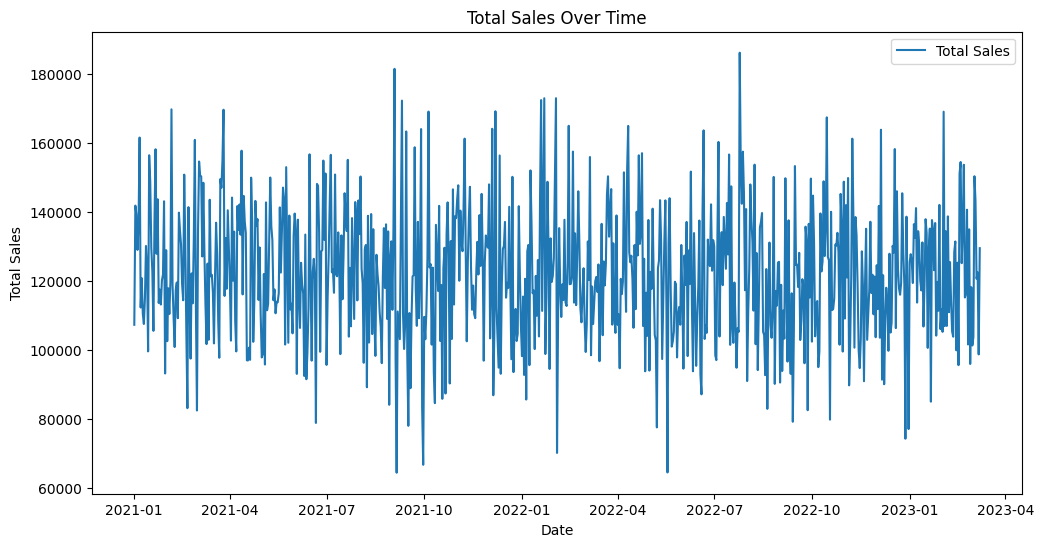

In [33]:
# Plotting the total sales over time
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_resampled['total_sales'], label='Total Sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [36]:
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.1 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 2.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.3/9.8 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.8/9.8 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 2.2 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.3 MB/s eta 0:00:04
   ------------- -------------------------- 3.4/9.8 MB 2.3 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.8 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.4 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.8 MB 2.5 MB/s eta 0:00:02
   ---------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\shobh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [37]:
# Decompose the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_cleaned_resampled['total_sales'], model='multiplicative', period=365)


<Figure size 1400x800 with 0 Axes>

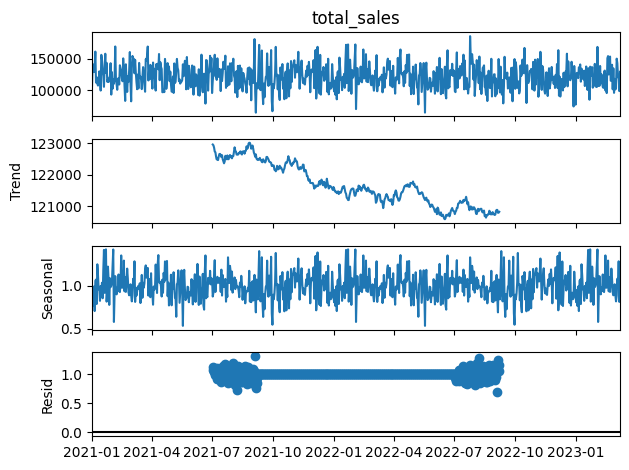

In [38]:
# Plot the decomposed components (Trend, Seasonal, Residual)
plt.figure(figsize=(14, 8))
result.plot()
plt.show()

In [40]:
df_cleaned.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,day_of_week,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled
invoice_date,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,6,12,4,2021,1,4,2,-0.002426,1.180703,0.680349
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,1,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,6,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,6,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,2,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620


In [41]:
df=df_cleaned

In [42]:
# Step 1: Customer Demographics (Age and Gender Segmentation)
# Age segmentation into bins for better demographic segmentation
age_bins = [0, 18, 25, 35, 45, 60, np.inf]  # Define age bins
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)



C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\385103223.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)


In [43]:
# Step 2: Category and Payment Methods Analysis
# Analyze trends in product categories and payment methods
category_sales = df.groupby('category').agg(
    total_sales=('total_sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    average_price=('price', 'mean')
).reset_index()

payment_sales = df.groupby('payment_method').agg(
    total_sales=('total_sales', 'sum'),
    total_quantity=('quantity', 'sum'),
    average_price=('price', 'mean')
).reset_index()

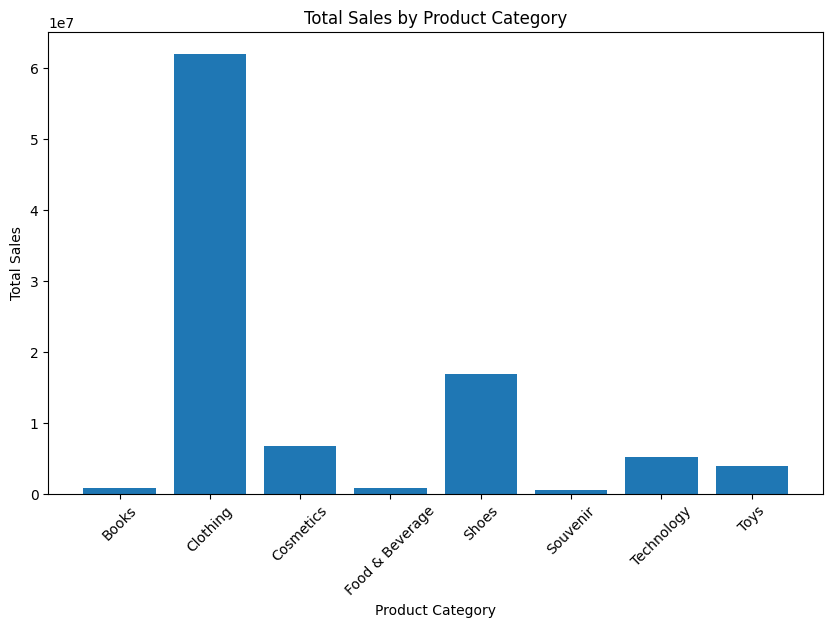

In [44]:
# Plot sales trends based on category
plt.figure(figsize=(10, 6))
plt.bar(category_sales['category'], category_sales['total_sales'])
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


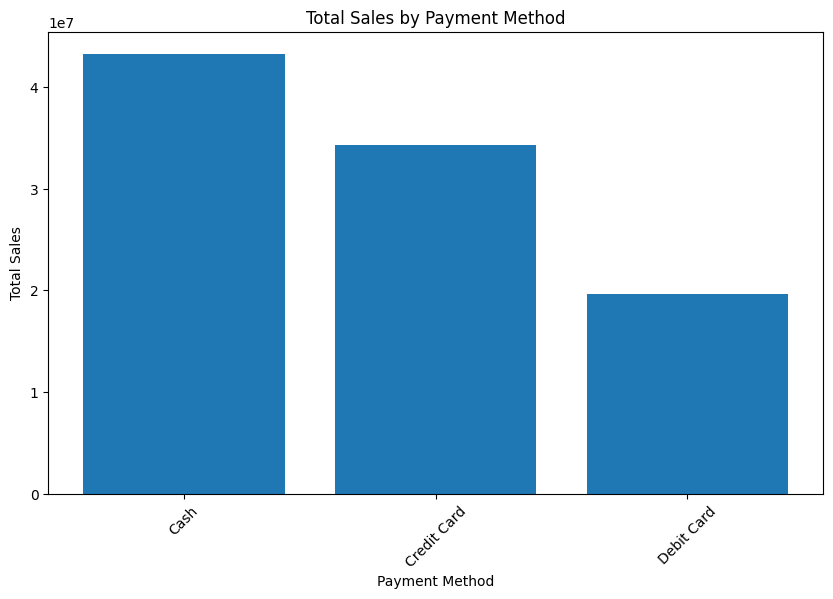

In [45]:
# Plot sales trends based on payment method
plt.figure(figsize=(10, 6))
plt.bar(payment_sales['payment_method'], payment_sales['total_sales'])
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [52]:
bins = [0, 18, 25, 35, 45, 60, np.inf]  # Define age bins
labels = ['Under 18', '19-25', '26-35', '36-45', '46-60', 'Above 60']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\2314000409.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


In [54]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35


In [55]:
# Analyze total sales by gender and age group
sales_by_gender = df_cleaned.groupby('gender')['total_sales'].sum()
sales_by_age_group = df_cleaned.groupby('age_group')['total_sales'].sum()

C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\1553711732.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_age_group = df_cleaned.groupby('age_group')['total_sales'].sum()


In [56]:
# Step 3: Category and Payment Methods - Analyze trends based on product category and payment method
sales_by_category = df_cleaned.groupby('category')['total_sales'].sum()
sales_by_payment_method = df_cleaned.groupby('payment_method')['total_sales'].sum()

In [57]:
# Step 4: Encode categorical variables (gender, category, payment method)
le_gender = LabelEncoder()
le_category = LabelEncoder()
le_payment_method = LabelEncoder()

In [59]:
df['gender_encoded'] = le_gender.fit_transform(df['gender'])
df['category_encoded'] = le_category.fit_transform(df['category'])
df['payment_method_encoded'] = le_payment_method.fit_transform(df['payment_method'])

C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\1170817301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender_encoded'] = le_gender.fit_transform(df['gender'])
C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\1170817301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_encoded'] = le_category.fit_transform(df['category'])
C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\1170817301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [62]:
# Step 2: Aggregate sales over time (daily, weekly, and monthly)

# Daily sales trend - Resample data to daily frequency and sum total sales
daily_sales = df.resample('D').agg({'total_sales': 'sum', 'quantity': 'sum'})

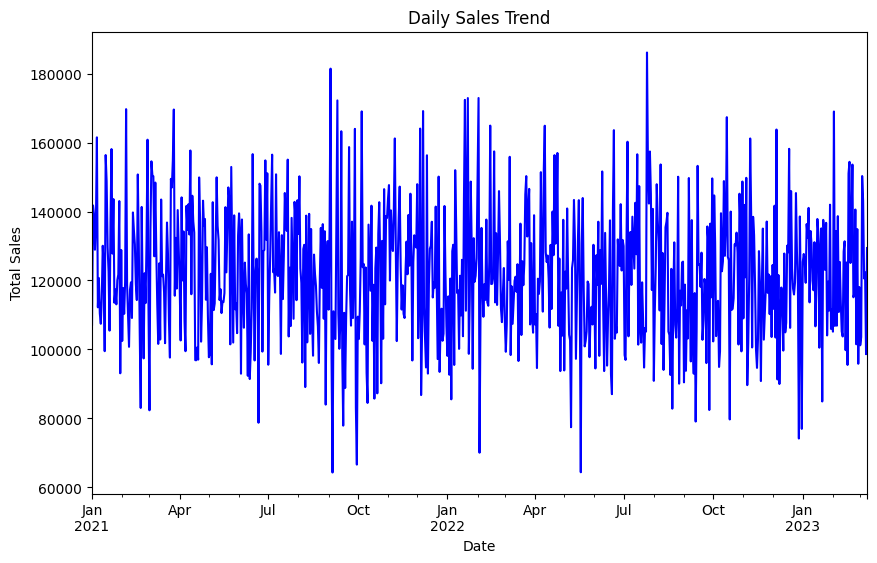

In [64]:
# Plot daily sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
daily_sales['total_sales'].plot(title='Daily Sales Trend', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

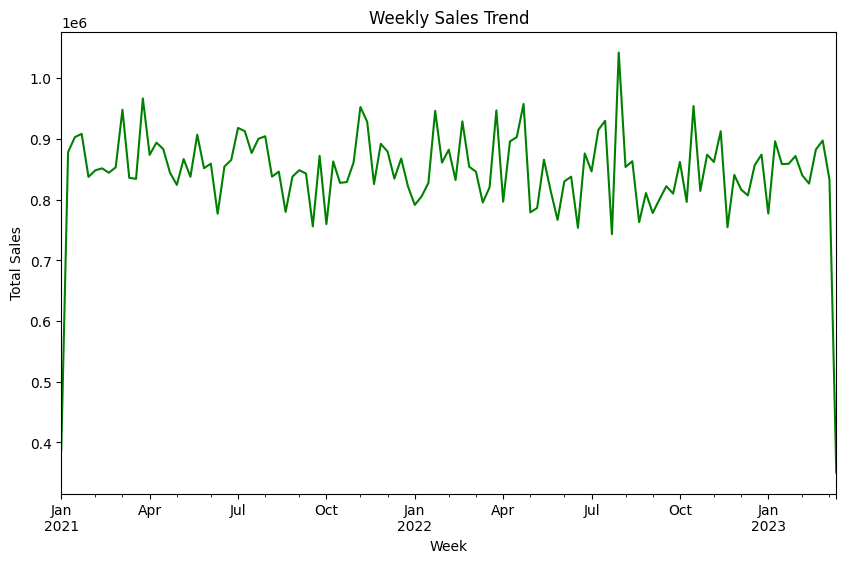

In [65]:
# Weekly sales trend - Resample data to weekly frequency and sum total sales
weekly_sales = df.resample('W').agg({'total_sales': 'sum', 'quantity': 'sum'})

# Plot weekly sales trend
plt.figure(figsize=(10, 6))
weekly_sales['total_sales'].plot(title='Weekly Sales Trend', color='green')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()

C:\Users\shobh\AppData\Local\Temp\ipykernel_48916\4049075547.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M').agg({'total_sales': 'sum', 'quantity': 'sum'})


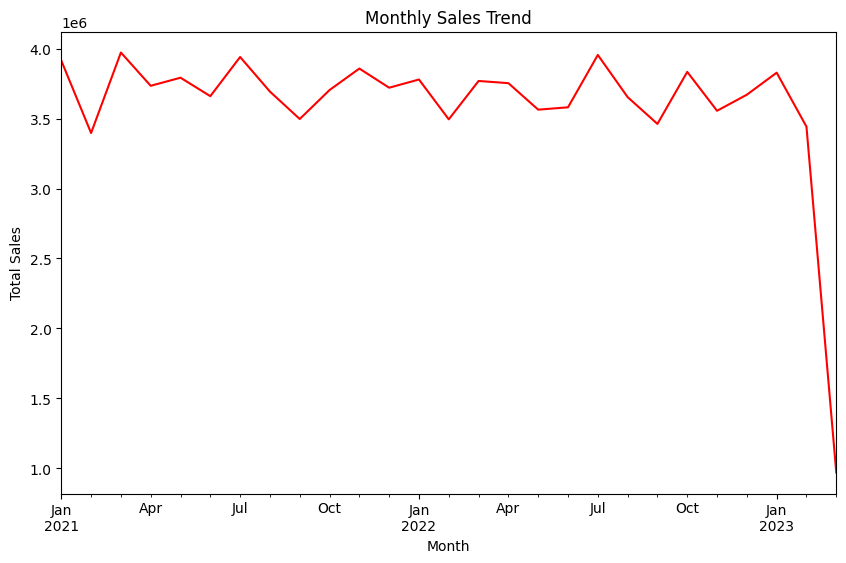

In [66]:
# Monthly sales trend - Resample data to monthly frequency and sum total sales
monthly_sales = df.resample('M').agg({'total_sales': 'sum', 'quantity': 'sum'})

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
monthly_sales['total_sales'].plot(title='Monthly Sales Trend', color='red')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [67]:
# You can also examine the trends by displaying the resampled sales data
print("Daily Sales:\n", daily_sales.head())
print("Weekly Sales:\n", weekly_sales.head())
print("Monthly Sales:\n", monthly_sales.head())

Daily Sales:
               total_sales  quantity
invoice_date                       
2021-01-01      107208.78       273
2021-01-02      141776.48       316
2021-01-03      139211.05       312
2021-01-04      128931.26       315
2021-01-05      136909.45       304
Weekly Sales:
               total_sales  quantity
invoice_date                       
2021-01-03      388196.31       901
2021-01-10      878184.46      2089
2021-01-17      902834.90      2065
2021-01-24      908241.93      2129
2021-01-31      837319.78      1902
Monthly Sales:
               total_sales  quantity
invoice_date                       
2021-01-31     3914777.38      9086
2021-02-28     3396661.92      7978
2021-03-31     3972286.10      9030
2021-04-30     3734405.60      8835
2021-05-31     3792258.21      9124


In [68]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,shopping_mall,total_sales,...,month,quarter,year,gender_encoded,category_encoded,payment_method_encoded,quantity_scaled,price_scaled,total_sales_scaled,age_group
invoice_date,,,,,,,,,,,,,,,,,,,,,
2021-12-12,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,Forum Istanbul,5401.53,...,12,4,2021,1,4,2,-0.002426,1.180703,0.680349,19-25
2021-11-09,I127801,C266599,Male,20,Clothing,1,300.08,Cash,Metrocity,300.08,...,11,4,2021,1,1,0,-1.417837,-0.413498,-0.527823,19-25
2021-10-24,I337046,C189076,Female,53,Books,4,60.60,Cash,Kanyon,242.40,...,10,4,2021,0,0,0,0.705279,-0.667945,-0.541483,46-60
2022-03-13,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,Istinye Park,40.66,...,3,1,2022,0,2,0,-1.417837,-0.689131,-0.589261,46-60
2021-01-13,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,Mall of Istanbul,1200.32,...,1,1,2021,0,1,1,-0.710132,-0.094665,-0.314620,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-09,I675411,C513603,Male,50,Toys,5,179.20,Cash,Metropol AVM,896.00,...,10,4,2021,1,7,0,1.412984,-0.541933,-0.386692,46-60
2022-09-21,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,Kanyon,293.25,...,9,3,2022,0,5,1,1.412984,-0.670017,-0.529441,36-45
2021-09-22,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,Forum Istanbul,20.92,...,9,3,2021,1,3,0,-0.710132,-0.721219,-0.593936,26-35


In [73]:
df_cleaned.to_csv("data.csv",index=True)